# Code for: ATP Tournament Winner Analysis

## Introduction

Tennis is one the world's most popular sports, with nearly one billion people tuning in annually to watch the greatest players contend for titles and glory. Many cite the diversity of play styles as tennis' greatest appeal; the different game plans, techniques, and body types of tennis players makes for endless combinations to create unique plays and strategies. With so many ways to compete, an age-old concern has been determining how play styles compare against each other. And since these play styles are determined in part by the players' physical characteristics, it's worth considering what the most desirable physical attributes are. Do left-handed players have an advantage over right-handed players? Is a two-handed backhand really that much better than the classic one-hander? Do the tallest players dominate the professional tour?

This project aims to find answers to these questions using data on tournament winners from the Association of Tennis Professionals (ATP), the premier international men's tennis tour. 

The data for this project are found in `tournaments_1877-2017_unindexed.csv` and `player_overviews_unindexed.csv`. The data are taken from the DataHub.io page on ATP World Tour tennis data. A link to page with data used for this project, as well as other datasets, can be found [here](https://datahub.io/sports-data/atp-world-tour-tennis-data)

In [1]:
# Import the necessary packages for analysis

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Import the data

set: pd.DataFrame = pd.read_csv("player_data.csv")

## Data preparation

`tournaments_1877-2017_unindexed.csv` contains data on all tournaments held on the ATP World Tour between 1877 and 2017, including the four majors. The data describe tournament date, location, playing surface, whether the tournament is indoors, and tournament winner, among other things. `player_overviews_unindexed.csv` contains information on players born in 1864 and after. The dataset contains player nationality, birth date, the year in which the player turned pro, height (in inches and centimeters), weight (in pounds and kilograms), handedness (whether they play left- or right-handed), and backhand type (whether they use a one- or two-handed backhand).

Using excel, the data on relevant player characteristics (i.e. height, weight, handedness, backhand, nationality) were merged into the tournament dataset by joining on the name of the tournamnet winner. We also need a measure of how successful players are. To get this, I created an excel function which would count the number of times that a player's name appears in the tournament data set and return the value for each player in the player dataset. This will allow us to compare the success of all players in the dataset. A python function performing the same process is given below as `title_ct`, but this is not used in creating the analysis datasets.

The data as given contain many columns which contain mostly missing values or which are not relevant to analyzing player performance characteristics. There are also many players in `player_overviews_unindexed.csv` that have little to no information in the dataset. Removing all of these instances will simplify our analysis, albeit with drawbacks related to how well the dataset represents the ATP tour population. In particular, players with little to no data tend to be older players who competed at a time when record keeping was less robust, meaning our final dataset heavily overrepresents recent players.

In [3]:
#Data cleaning and merging

# Drop redundant and useless columns: 'first_name', 'last_name', 'player_url' , 'residence', 'birthplace', 'birthdate', 'birth_year',
# 'birth_month', 'birth_day', 'height_ft'

set_no_useless: pd.DataFrame = set.drop(['first_name', 'last_name', 'player_url' , 'residence', 'birthplace', 'birthdate',
                                                                'birth_year','birth_month','birth_day','height_ft'],axis=1)

#Drop players for which there is missing data

set_no_missing_no_useless: pd.DataFrame = set_no_useless.dropna(how='any')

#Fix indexing to start from 0
set_no_missing_no_useless.sort_index(axis=0, ascending=True)

index = range(len(set_no_missing_no_useless))
set_final = set_no_missing_no_useless.reset_index(drop=True)

# drop players who have zero values for numerical columns

mask = (set_final["turned_pro"] != 0) & (set_final["weight_lbs"] != 0) & (set_final["weight_kg"] != 0) & (set_final["height_inches"] != 0) & (set_final["height_cm"] != 0)

unwanted_rows = set_final[~mask]

set_final = set_final.drop(unwanted_rows.index)


set_final = set_final.reset_index(drop = True)

# preview
set_final.head()

,player_id,player_slug,flag_code,turned_pro,weight_lbs,weight_kg,height_inches,height_cm,handedness,backhand
0,a063,arthur-ashe,USA,1969.0,160.0,73.0,73.0,185.0,Right-Handed,One-Handed Backhand
1,a092,andre-agassi,USA,1986.0,177.0,80.0,71.0,180.0,Right-Handed,Two-Handed Backhand
2,a276,jan-frode-andersen,NOR,1997.0,187.0,85.0,75.0,191.0,Left-Handed,Two-Handed Backhand
3,a311,hugo-armando,USA,1997.0,180.0,82.0,72.0,183.0,Right-Handed,One-Handed Backhand
4,a356,thierry-ascione,FRA,2000.0,196.0,89.0,74.0,188.0,Right-Handed,One-Handed Backhand


In [4]:
# Getting tourney count totals from each player
# Import tournament data

tourney: pd.DataFrame = pd.read_csv("tournament_data.csv")

# tourney.head()

# tourney.columns

#Drop unnecessary vars: 'tourney_order', 'tourney_location', 'tourney_dates', 'tourney_month', 'tourney_day', 'tourney_fin_commit', 'tourney_url_suffix', 'singles_winner_url', 'weight_lbs', 'weight_kg', 'height_ft', 'height_inches', 'height_cm', 'handedness', 'backhand'
tourney_edit: pd.DataFrame = tourney.drop(['tourney_order', 'tourney_location', 'tourney_dates', 'tourney_month', 'tourney_day', 
                                           'tourney_fin_commit', 'tourney_url_suffix', 'singles_winner_url', 'weight_lbs', 'weight_kg', 
                                           'height_ft', 'height_inches', 'height_cm', 'handedness', 'backhand'], axis = 1)

#Create function to generate title count totals for each player

def title_ct(set_player: pd.DataFrame, set_tourney: pd.DataFrame) -> np.ndarray:
    title_list: np.ndarray = np.zeros(len(set_player))
    for i in range(len(set_player)):
        store: int = 0
        for j in range(len(set_tourney)):
            if set_player.iloc[i,0] == set_tourney.iloc[j,8]:
                store = store + 1
        title_list[i] = store
    return title_list


# Preview (uncomment)
# print(title_ct(set_final, tourney_edit))

# new_column: pd.DataFrame = pd.DataFrame(title_ct(set_final, tourney_edit), columns = ["Title Count"])

# set_merged = pd.concat([set_final,new_column], axis = 1)

# set_merged.head()
                

With data on both the tournaments played and the players who competed, we can create a cleaned and merged dataset which displays player data for each champion at the annual tournament level:

In [5]:
# Merge in data on player height, weight, handedness, backhand, and when they turned pro

tourney_edit = tourney_edit.rename(columns = {"singles_winner_player_id" : "player_id"})

tourney_final = pd.merge(tourney_edit,set_final,
                        on = 'player_id',
                        how = 'inner',
                        suffixes = ('','_drop'))


tourney_final = tourney_final.sort_values(by = "singles_winner_name")

tourney_final = tourney_final.drop(['flag_code','singles_winner_player_slug','singles_winner_name'] ,axis = 1)

tourney_final = tourney_final[['tourney_year','tourney_name', 'tourney_id', 
       'tourney_singles_draw', 'tourney_conditions', 'tourney_surface', 
       'player_slug', 'player_id', 'player_nationality','player_title_count', 
       'turned_pro', 'weight_lbs', 'weight_kg', 'height_inches', 'height_cm', 
       'handedness', 'backhand']]

tourney_final.head()

,tourney_year,tourney_name,tourney_id,tourney_singles_draw,tourney_conditions,tourney_surface,player_slug,player_id,player_nationality,player_title_count,turned_pro,weight_lbs,weight_kg,height_inches,height_cm,handedness,backhand
926,1999,Bournemouth,620.0,32,Outdoor,Clay,adrian-voinea,v166,ROU,1.0,1993.0,160.0,73.0,73.0,185.0,Right-Handed,One-Handed Backhand
1261,2007,World Team Championship,615.0,32,Outdoor,Clay,agustin-calleri,c478,ARG,3.0,1995.0,190.0,86.0,72.0,183.0,Right-Handed,One-Handed Backhand
1259,2003,Acapulco,807.0,32,Outdoor,Clay,agustin-calleri,c478,ARG,3.0,1995.0,190.0,86.0,72.0,183.0,Right-Handed,One-Handed Backhand
1260,2006,Kitzbuhel,319.0,48,Outdoor,Clay,agustin-calleri,c478,ARG,3.0,1995.0,190.0,86.0,72.0,183.0,Right-Handed,One-Handed Backhand
685,1996,Gstaad,314.0,32,Outdoor,Clay,albert-costa,c378,ESP,13.0,1993.0,172.0,78.0,71.0,180.0,Right-Handed,One-Handed Backhand


# Descriptive Statistics

In [6]:
# Table of descriptive stats for players in dataset

set_final.describe()

,turned_pro,weight_lbs,weight_kg,height_inches,height_cm
count,551.000000,551.000000,551.000000,551.000000,551.000000
mean,2003.794918,176.395644,80.054446,73.014519,185.455535
std,7.359079,15.331711,6.951307,2.643649,6.805434
min,1964.000000,141.000000,64.000000,66.000000,168.000000
25%,1999.000000,165.000000,75.000000,71.000000,180.000000
50%,2004.000000,176.000000,80.000000,73.000000,185.000000
75%,2009.000000,185.000000,84.000000,75.000000,191.000000
max,2017.000000,238.000000,108.000000,83.000000,211.000000


The table above provides some interesting insights into the sample of 550 players in the dataset:
 - The median year turned pro is 2004. Since the range of years is 1969 to 2017, this is an indication that the dataset over-represents modern players.
 - Perhaps as expected, the distribution of heights and weights illustrates a relatively fit group of players. Player weights range between 141 and 238 lbs, and the shortest and tallest players are 5'6" and 6'11, respectively.
 

<Axes: title={'center': 'Player backhand style'}, ylabel='Backhand'>

<Figure size 640x480 with 0 Axes>

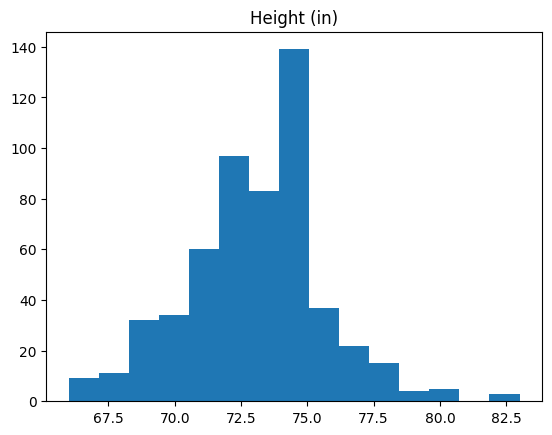

<Figure size 640x480 with 0 Axes>

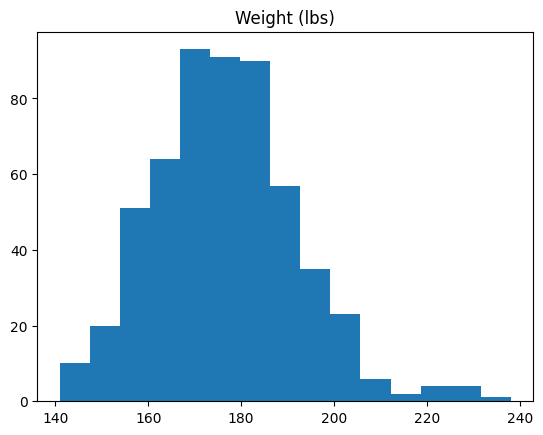

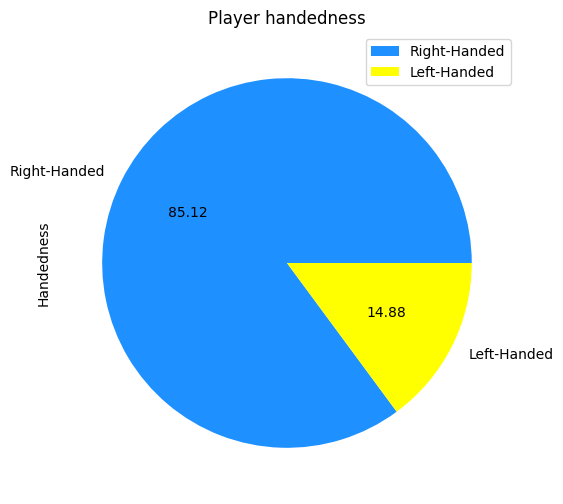

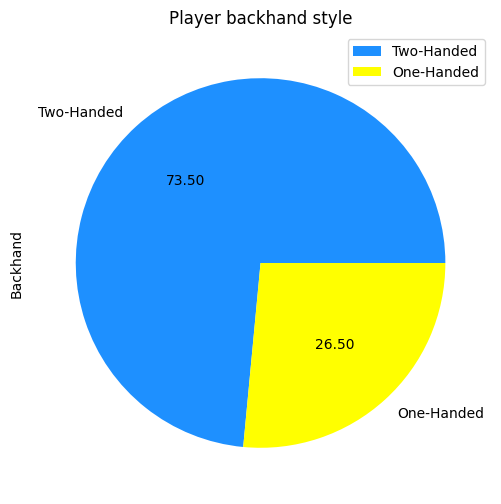

In [7]:
# Descriptive statistics of the players in the dataset
# Using set_final so that every player is counted only once

# Player height

plt.figure(num = "Player Heights")

player_height_hist = pd.DataFrame(
    {"Height (in)" : set_final.iloc[:,6]}
)

player_height_hist.hist(bins = 15, grid = False)

# Player weight

plt.figure(num = "Player Weights")

player_weight_hist = pd.DataFrame(
    {"Weight (lbs)" : set_final.iloc[:,4]}
)

player_weight_hist.hist(bins = 15, grid = False)

# Player handedness

count_righthand = len(set_final[set_final["handedness"] == "Right-Handed"])

count_lefthand = len(set_final[set_final["handedness"] == "Left-Handed"])

player_handedness = pd.DataFrame(
    {
        "Handedness": np.array([count_righthand, count_lefthand])
    }
)

player_handedness.plot.pie(
    y = "Handedness",
    labels = ["Right-Handed", "Left-Handed"],
    colors = ["dodgerblue", "yellow"],
    figsize = ([6,6]),
    autopct = "%.2f",
    title = "Player handedness"
    )

# Player backahnd style

count_onehand = len(set_final[set_final["backhand"] == "One-Handed Backhand"])

count_twohand = len(set_final[set_final["backhand"] == "Two-Handed Backhand"])

player_backhand = pd.DataFrame(
    {
        "Backhand": np.array([count_twohand, count_onehand])
    }
)

player_backhand.plot.pie(
    y = "Backhand",
    labels = ["Two-Handed", "One-Handed"],
    colors = ["dodgerblue", "yellow"],
    figsize = ([6,6]),
    autopct = "%.2f",
    title = "Player backhand style"
    )

Height:
 - Player height is predictably skewed to the right, with a median at 73 inches. There is, however, a clear mode in the bin just below 75 in (6ft 3in). Half of all players are between 70 and 75 inches, and there are far more players below this range than above.

Weight:
 - Player weight seems right-skewed with a mean at 176.4 lbs. The highest weight in here is 238 lbs, and the lowest is 141 lbs.
Half of all players in the data set are between 165 and 185, with more below this weight than above.

Handedness:
 - The pie chart shows that the overwhelming majority of players (85.12%) are right-handed.

Backhand style:
 - The pie chart shows that roughly 75% of players use a two-handed backhand.

array([<Axes: ylabel='Indoor'>, <Axes: ylabel='Outdoor'>], dtype=object)

<Figure size 640x480 with 0 Axes>

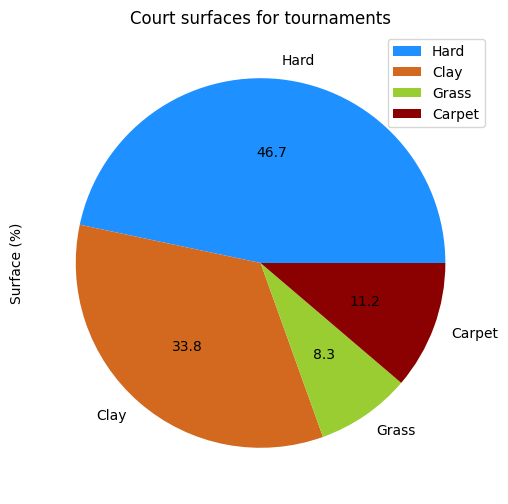

<Figure size 640x480 with 0 Axes>

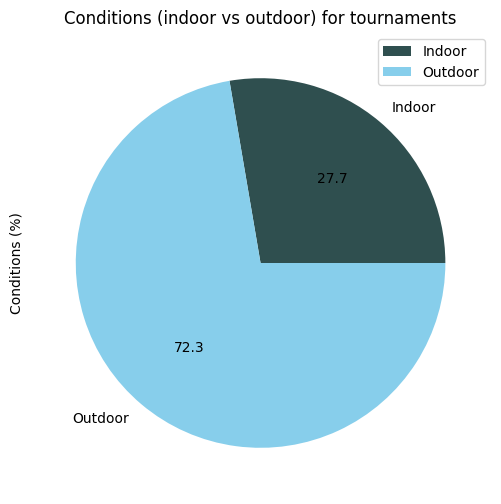

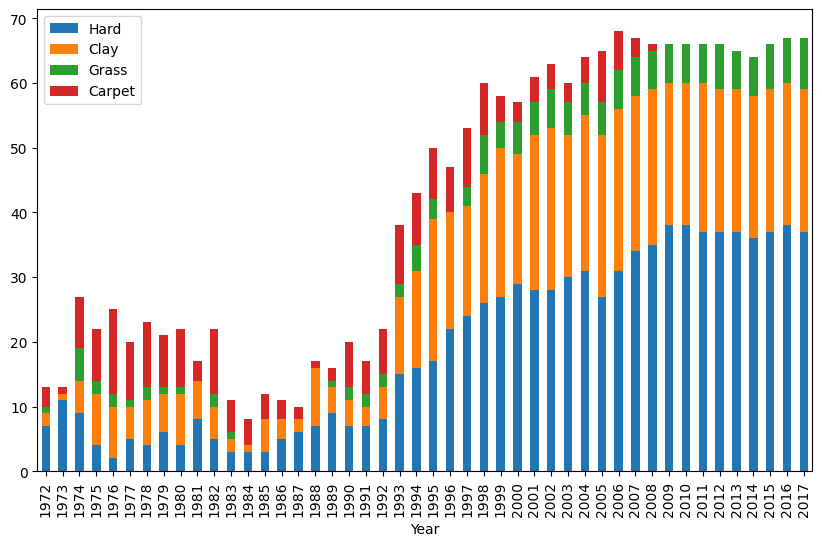

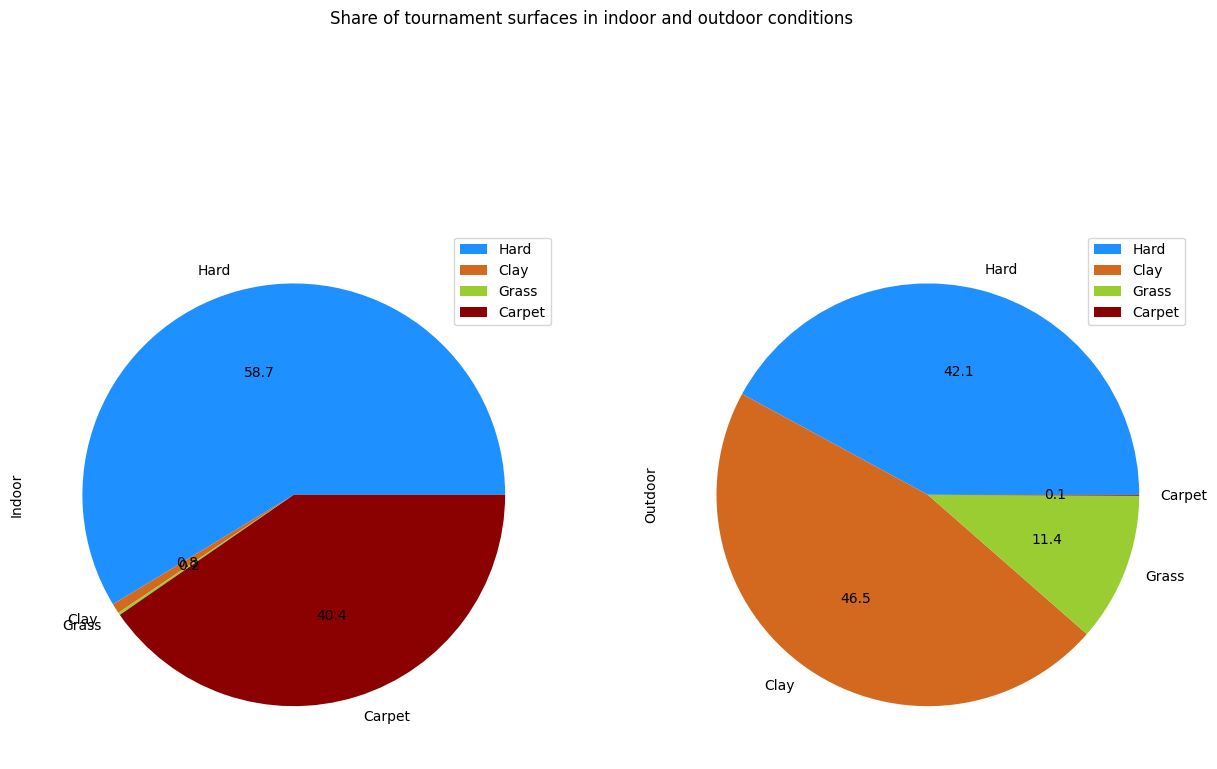

In [8]:
# Descriptive stats for tourneys
# Tourney_final has one entry for each time a tournament is held. Not every tournament is held every year in the data set

# Tourneys by surface

plt.figure(num = "Surfaces")

count_hard = len(tourney_final[tourney_final["tourney_surface"] == "Hard"])

count_clay = len(tourney_final[tourney_final["tourney_surface"] == "Clay"])

count_grass = len(tourney_final[tourney_final["tourney_surface"] == "Grass"])

count_carpet = len(tourney_final[tourney_final["tourney_surface"] == "Carpet"])

surface_table = pd.DataFrame(
    {
        "Surface (%)" : np.array([count_hard, count_clay, count_grass, count_carpet])
    }
)

surface_table.plot.pie(
    y = "Surface (%)",
    labels = ["Hard", "Clay", "Grass", "Carpet"],
    colors = ["dodgerblue", "chocolate", "yellowgreen", "darkred"],
    figsize = ([6,6]),
    autopct="%.1f",
    title = "Court surfaces for tournaments"
)

# Tourneys by conditions

plt.figure(num = "Conditions")

count_indoor = len(tourney_final[tourney_final["tourney_conditions"] == "Indoor"])

count_outdoor = len(tourney_final[tourney_final["tourney_conditions"] == "Outdoor"])

conditions_table = pd.DataFrame(
    {
        "Conditions (%)" : np.array([count_indoor, count_outdoor])
    }
)

conditions_table.plot.pie(
    y = "Conditions (%)",
    labels = ["Indoor", "Outdoor"],
    colors = ["darkslategray", "skyblue"],
    figsize = ([6,6]),
    autopct="%.1f",
    title = "Conditions (indoor vs outdoor) for tournaments"
)

# ADDITIONAL: Change in proportion of tournaments on four surfaces over time

# DataFrame with surface as columns, years as rows

def ann_surface_breakdown(table: pd.DataFrame) -> pd.DataFrame:
    store_proto: np.ndarray = np.zeros(shape=(len(range(1972,2018,1)),4))
    store: pd.DataFrame = pd.DataFrame(store_proto)
    index: int = 0
    for i in range(1972,2018,1):
        hard_tally : int = 0
        clay_tally : int = 0
        grass_tally : int = 0
        carpet_tally : int = 0
        for j in range(len(table)):
            if table.iloc[j,0] == i and table.iloc[j,5] == "Hard":
                hard_tally = hard_tally + 1
            elif table.iloc[j,0] == i and table.iloc[j,5] == "Clay":
                clay_tally = clay_tally + 1
            elif table.iloc[j,0] == i and table.iloc[j,5] == "Grass":
                grass_tally = grass_tally + 1
            elif table.iloc[j,0] == i and table.iloc[j,5] == "Carpet":
                carpet_tally = carpet_tally + 1
        store.iloc[index,0] = hard_tally
        store.iloc[index,1] = clay_tally
        store.iloc[index,2] = grass_tally
        store.iloc[index,3] = carpet_tally
        index = index + 1
    return store

ann_surface_table = pd.DataFrame(ann_surface_breakdown(tourney_final))

ann_surface_table.rename(columns=
    {
        0: "Hard",
        1: "Clay",
        2: "Grass",
        3: "Carpet",
    },
    inplace = True
)

# Add in a column for the year

ann_surface_table_final = pd.DataFrame(
    {
        "Year" : np.array(range(1972,2018,1)),
        "Hard" : np.array(ann_surface_table.iloc[:,0]),
        "Clay" : np.array(ann_surface_table.iloc[:,1]),
        "Grass" : np.array(ann_surface_table.iloc[:,2]),
        "Carpet" : np.array(ann_surface_table.iloc[:,3]),
    }
)

ann_surface_table_final.head()

# Stacked bar chart of surface type by year

ann_surface_table_final.plot.bar(stacked=True,
                             x = "Year",
                             figsize = ([10,6])
                             )

# Intersection of surface and conditions

def surface_and_condition(set : pd.DataFrame):
    surface_list = ["Hard", "Clay", "Grass", "Carpet"]
    conditions_list = ["Indoor", "Outdoor"]
    column_index = 0
    table = pd.DataFrame(
        {
            "Indoor" : np.zeros(4),
            "Outdoor" : np.zeros(4)
        }
    )
    for i in conditions_list:
        row_index = 0
        for j in surface_list:
            table.iloc[row_index,column_index] = len(set[(set["tourney_surface"] == j) & (tourney_final["tourney_conditions"] == i)])
            row_index += 1
        column_index += 1
    return table
            

surface_condition_table = surface_and_condition(tourney_final)

surface_condition_table.plot.pie(
    subplots = True,
    title = "Share of tournament surfaces in indoor and outdoor conditions",
    labels = ["Hard", "Clay", "Grass", "Carpet"],
    colors = ["dodgerblue", "chocolate", "yellowgreen", "darkred"],
    figsize = ([15,10]),
    autopct="%.1f"
)

Some notes from these figures:
 - The first pie chart provides strong insight into the prevalence of each tennis court surface for the past 50 years. Hard courts are used at nearly half of all tournaments, while clay courts make up roughly a third. Grass and carpet tournaments are comparatively rare.
 - It is also clear that most tournaments are played outside. In fact, virtually all indoor tournaments are played on hard and carpet courts, while outdoor tournaments are always on hard, grass, or clay with few exceptions.
 - The bar graph shows that hard and clay have together been the predominant surfaces for play since at least the early 90's.
 - However, the relative shares of hard, clay, and grass tournaments every year does not show a clear trend.
 - If anything, the number of grass court tournaments has increased steadily as a share of all tournaments played.
 - Carpet tournamnets used to be the most common, but have gradually been phased out. Now there are currently no professional events
held on carpet.

# What makes a good tennis player?

<Axes: xlabel='Year', ylabel='Share of annual tourneys won by players 6ft 2in or taller'>

<Figure size 640x480 with 0 Axes>

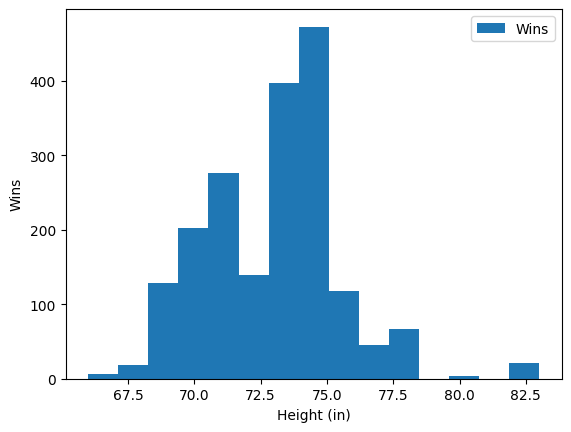

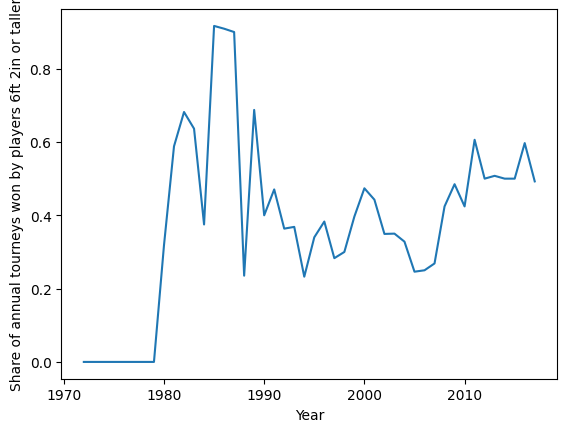

In [9]:
#Analysis code
#Analyzing title counts based on player characteristics

## Tournament wins by height in cm, in

wins_height_in = pd.DataFrame(
    {"Wins" : tourney_final.iloc[:,13]}
)

wins_height_cm = pd.DataFrame(
    {"Wins" : tourney_final.iloc[:,14]}
)

plt.figure()

wins_height_in.plot.hist(
    ylabel = "Wins",
    xlabel = "Height (in)",
    bins = 15
    )

# wins_height_cm.plot.hist(
#     ylabel = "Wins",
#     xlabel = "Height(cm)",
#     bins = 15
#     )


## Has height distribution of tournament winners changed over time?

wins_height_in.describe() # avg winner height over all years in time period is approx 73 in i.e. 6' 1"

# Analyze by finding percentage of wins by players with height >= 74 in (one inch above the approx average) for each year, then plot this series

def ann_tall_ratio(table: pd.DataFrame) -> pd.DataFrame:
    store_proto: np.ndarray = np.zeros(shape=(len(range(1972,2018,1)),1))
    store: pd.DataFrame = pd.DataFrame(store_proto)
    index: int = 0
    for i in range(1972,2018,1):
        all_titles: int = 0
        titles_tall_winner: int = 0
        for j in range(len(table)):
            if table.iloc[j,0] == i and table.iloc[j,13] < 74:
                all_titles = all_titles + 1
            elif table.iloc[j,0] == i and table.iloc[j,13] >= 74:
                all_titles = all_titles + 1
                titles_tall_winner = titles_tall_winner + 1
        title_ratio: float = titles_tall_winner / all_titles
        store.iloc[index] = title_ratio
        index = index + 1
    return store

ratio_table = pd.DataFrame(
    {
        "Year" : np.array(range(1972,2018,1)),
        "Pct of tourney wins" : np.array(ann_tall_ratio(tourney_final).iloc[:,0])
    }
)

# Fix the index to have x-axis as years from 1972 to 2017

ratio_table.plot(ylabel = "Share of annual tourneys won by players 6ft 2in or taller",
                 x = "Year",
                 legend = False)         

First, let's examine the attribute which is most commonly associated with advantage in tennis: height. Taller players have longer limbs are are able to more easily cover areas of the court than shorter players. Taller players also have better angles to hit offensive serves and take high balls early. Most people believe taller players have an advantage over smaller players.

But what do the data say? Looking at the heights of tournament winners in the dataset, this advantage isn't apparent. Comparing the distribution of wins with the distribution of player heights overall, there is not any indication that the tallest players are most likely to win. Rather, the players winning a disproportionately large amount of tournaments are those between 6'1" and 6'3". This goldilocks zone suggests that the optimal height is one that is just above average.

But this advantage depends on the type of tennis that players are playing. As tennis points have become longer and less focused on serve-and-volley tactics, the importance of the serve has decreased slightly. Such a shift could neutralize the advantage of taller players. To illustrate this, I created a function to calculate the fraction of tournaments every year that were won by players with heights 6'2" or above. The resulting time series indicates that the height advantage has not been constant over time. Being tall was a huge advantage in the 80s, with over 80% of tournaments being won by tall players in those years. As baseline styles evloved in the 90s and 2000s, however, the dominance of tall players dipped, and tall players won only roughly half of annual tournaments.

We see an interesting uptick in tall wins in the 2010s. It's possible that tall players who grew up playing modern tennis are now better able to combine the best aspects of modern baseline tennis with the service advantages of their height. Regardless, it's clear that the ideal tennis height is not fixed, but rather changes as the sport itself changes.

We can also examine how height helps players on different surfaces and in different conditions:

<Axes: title={'center': 'Isner and Karlovic title breakdown by surface'}, ylabel='Frequency'>

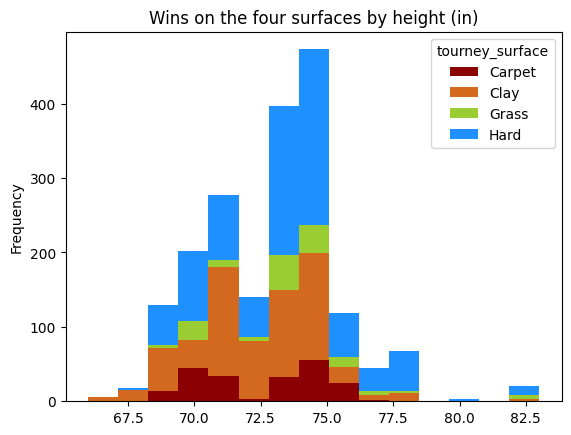

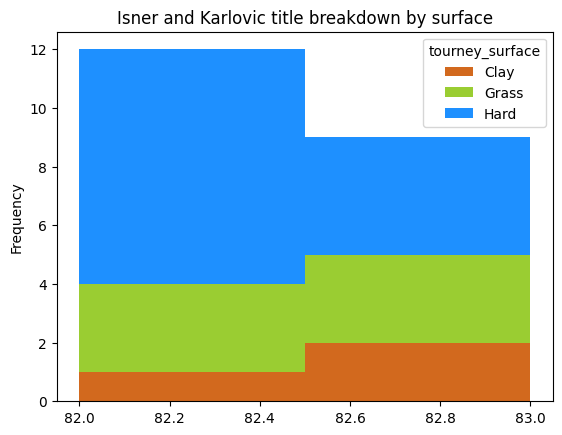

In [10]:
## Is the distribution of champion heights different for different surfaces?

# Columns are surface, rows are tournament winners with height for each

surface_height_pivot: pd.DataFrame = tourney_final.pivot(columns = "tourney_surface", values = "height_inches")
# surface_height_pivot.head()

surface_height_pivot.plot.hist(
    stacked = True,
    bins = 15,
    color = ["darkred", "chocolate", "yellowgreen", "dodgerblue"],
    title = "Wins on the four surfaces by height (in)"
)

# Just for Izzy and Dr. Ivo

tall_boys: pd.DataFrame = tourney_final[tourney_final["height_inches"] >= 82]

surface_tall_pivot: pd.DataFrame = tall_boys.pivot(columns = "tourney_surface", values = "height_inches")

surface_tall_pivot.plot.hist(
    stacked = True,
    bins = 2,
    color = ["chocolate", "yellowgreen", "dodgerblue"],
    title = "Isner and Karlovic title breakdown by surface"
)

This breakdown provides some analytical clarity on a common discussion among tennis fans: do different surfaces favor people of different heights?
The concensus is that the fast, low bounce of a grass court makes big serves even more potent, giving the edge to tall players.
Meanwhile, the slow, high bounce of clay courts favors shorter players who are able to netrualize powerful shots and extend rallies,
beating bigger players with their superior endurance. Hard and carpet courts are somewhere in-between.

The data suggest that this may be the case. The first graph shows the distribution of winner heights broken out into the four surfaces. Comparing clay results to hard and grass, players just under 6'0" have almost as many clay court wins as players in the goldilocks zone. Hard and grass court wins still strongly favor players between 6'1" and 6'3". The opposite advantage on grass for taller players is not borne out in the data.

There does seem to be a disproportionate share of tournaments won by players around 82.5 inches tall.
Only two players in this dataset -- John Isner and Ivo Karlovic -- are this tall, and yet they have a combined 21 titles.

Focusing on their title wins, it is clear that their titles are disporportionately skewed to hard and grass courts.
Even though grass tournaments have been far less common during their careers than clay tournaments, both players have more grass court
titles. Although there are too few data points to make a conclusive judgment, the titles of these extremely tall players are evidence suggesting that extreme height may be an advantage, but primarily on hard and grass courts. On clay courts, being nearly 7 feet tall seems to do more harm than good.

<Axes: ylabel='Frequency'>

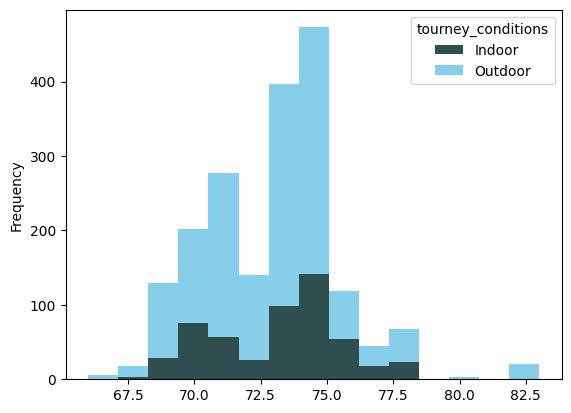

In [11]:
# Conditions

# Is indoors/outdoors an advantage for players of different heights?

conditions_pivot: pd.DataFrame = tourney_final.pivot(columns = "tourney_conditions", values = "height_inches")

conditions_pivot.plot.hist(
    stacked = True,
    bins = 15,
    color = ["darkslategray", "skyblue"]
)

Judging from the figure, there does not seem to be a strong advantage for taller players to play indoors or outdoors.

<Axes: title={'center': 'Share of titles won by handedness, excluding Nadal'}, ylabel='Handedness'>

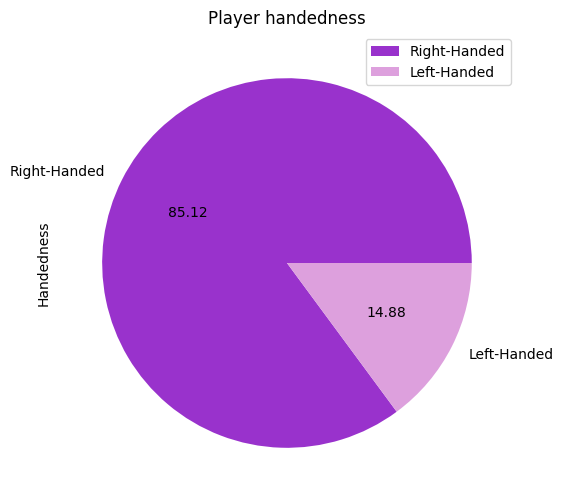

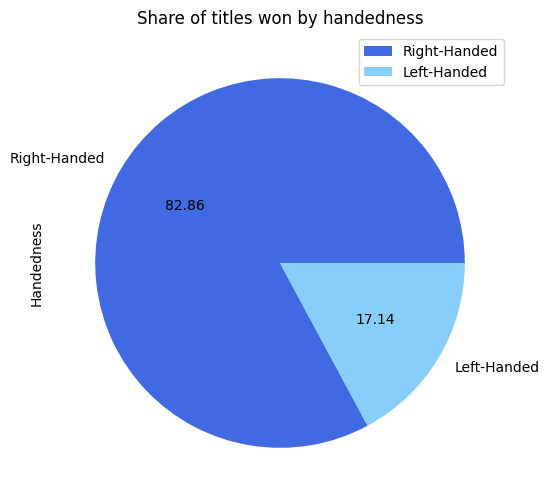

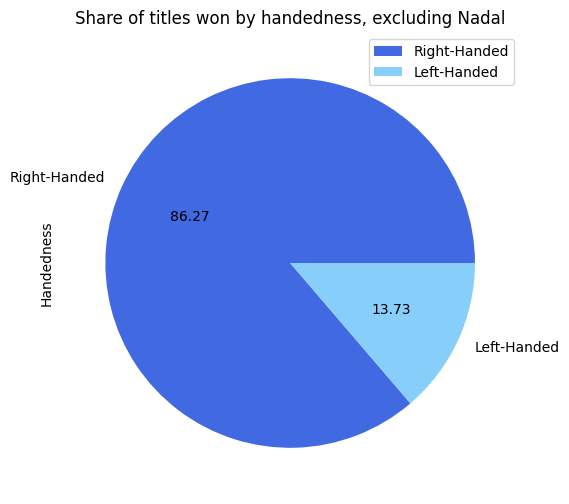

In [12]:
# Handedness

# Do lefties have an advantage overall?

player_handedness.plot.pie(
    y = "Handedness",
    labels = ["Right-Handed", "Left-Handed"],
    colors = ["darkorchid", "plum"],
    figsize = ([6,6]),
    autopct = "%.2f",
    title = "Player handedness"
    )


title_count_righthand = len(tourney_final[tourney_final["handedness"] == "Right-Handed"])

title_count_lefthand = len(tourney_final[tourney_final["handedness"] == "Left-Handed"])

title_count_handedness = pd.DataFrame(
    {
        "Handedness": np.array([title_count_righthand, title_count_lefthand])
    }
)

title_count_handedness.plot.pie(
    y = "Handedness",
    labels = ["Right-Handed", "Left-Handed"],
    colors = ["royalblue", "lightskyblue"],
    figsize = ([6,6]),
    autopct = "%.2f",
    title = "Share of titles won by handedness"
)

tourney_norafa = tourney_final[tourney_final["player_slug"] != "rafael-nadal"]

title_count_lefthand_norafa: pd.DataFrame = len(tourney_norafa[tourney_norafa["handedness"] == "Left-Handed"])

title_handedness_norafa = pd.DataFrame(
    {
        "Handedness" : np.array([title_count_righthand, title_count_lefthand_norafa])
    }
)

title_handedness_norafa.plot.pie(
    y = "Handedness",
    labels = ["Right-Handed", "Left-Handed"],
    colors = ["royalblue", "lightskyblue"],
    figsize = ([6,6]),
    autopct = "%.2f",
    title = "Share of titles won by handedness, excluding Nadal"
)

Handedness also plays a large role in determining how players match up against each other. Most believe that left-handed players, who are far less common than righties, have an advantage since other players will not be used to the unique spins generated by playing with the other hand. Is this true?

The title count data seems to suggest that left-handed players win a slightly disproportionately higher share of tournaments than right-handed players, although this margin is quite small. 

We also have to acknowledge that there is a notable left-handed outlier: Rafael Nadal. Nadal, who holds 75 of the titles in this dataset, may single-handedly be inflating the share of lefty victories. To check this, I reran the analysis, excluding Nadal from the dataset.

After excluding Nadal, the proportion of titles won by left-handed players falls to a level very similar to the propotion of left-handed
players in the dataset (14.88 of players vs 13.73 of titles). Most would agree that Rafa Nadal's immense success as a professional player
is not due mainly to the his left-handed shots but instead his excellent fitness and competitive spirit. The data show that, overall, left-handed players are roughly just as successful as right-handed players when it comes to winning tournaments.

Finally, let's look at the importance of backhand type.

<Axes: title={'center': 'Share of titles won by backhand styles, excluding Federer'}, ylabel='backhand'>

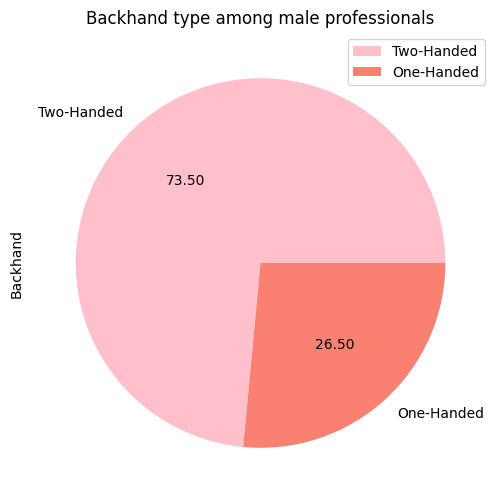

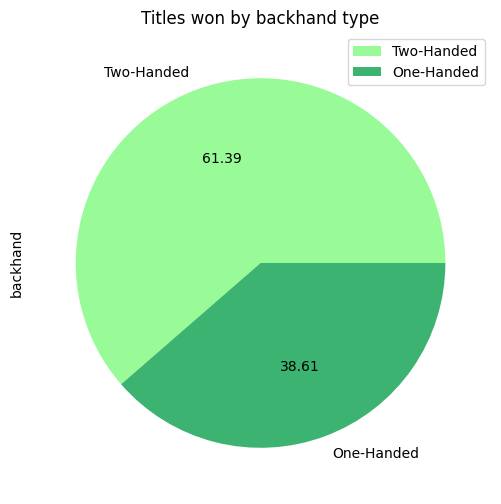

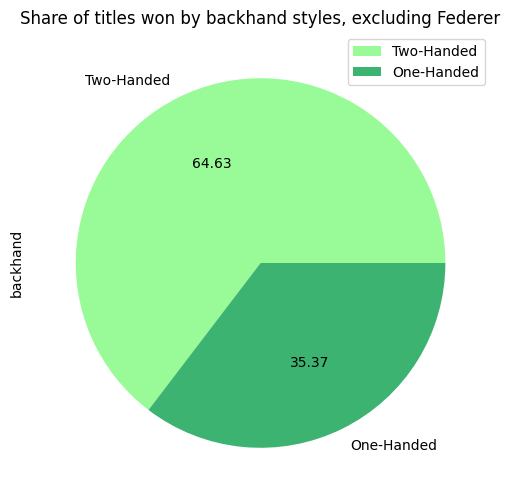

In [13]:
# Backhand style

# Does one backhand style have a particular advantage?

player_backhand.plot.pie(
    y = "Backhand",
    labels = ["Two-Handed", "One-Handed"],
    colors = ["pink", "salmon"],
    figsize = ([6,6]),
    autopct = "%.2f",
    title = "Backhand type among male professionals"
    )

title_count_twohand: pd.DataFrame = len(tourney_final[tourney_final["backhand"] == "Two-Handed Backhand"])

title_count_onehand: pd.DataFrame = len(tourney_final[tourney_final["backhand"] == "One-Handed Backhand"])

title_backhand = pd.DataFrame(
    {
        "backhand" : np.array([title_count_twohand, title_count_onehand])
    }
)

title_backhand.plot.pie(
    y = "backhand",
    labels = ["Two-Handed", "One-Handed"],
    colors = ["palegreen", "mediumseagreen"],
    figsize = ([6,6]),
    autopct = "%.2f",
    title = "Titles won by backhand type"
)

# Remove Roger -- a clear outlier

tourney_noroger = tourney_final[tourney_final["player_slug"] != "roger-federer"]

title_count_twohand_noroger: pd.DataFrame = len(tourney_noroger[tourney_noroger["backhand"] == "Two-Handed Backhand"])

title_count_onehand_noroger: pd.DataFrame = len(tourney_noroger[tourney_noroger["backhand"] == "One-Handed Backhand"])

title_backhand_noroger = pd.DataFrame(
    {
        "backhand" : np.array([title_count_twohand_noroger, title_count_onehand_noroger])
    }
)

title_backhand_noroger.plot.pie(
    y = "backhand",
    labels = ["Two-Handed", "One-Handed"],
    colors = ["palegreen", "mediumseagreen"],
    figsize = ([6,6]),
    autopct = "%.2f",
    title = "Share of titles won by backhand styles, excluding Federer"
)

The debate between one- and two-handed backhands is intense, and there is no one concensus on which is better. One-handers generally are able to generate more top-spin and therefore more versatility, while two-handed backhands are more consistent and reliable. Two-handed backhands are also generally easier to learn and master. Can the data settle this debate once and for all?

These first two charts above indicate that one-handed backhands have a clear advantage over two-handed ones. Despite only making up 26% of players in the dataset, one-handed backhand users have won more than 38% of the titles. This could be due to the increased range of motion, topspin, and variety that is afforded to people with one-handed backhands. 

But wait! Before you go switch to one-hander yourself, note that there is a very significant outlier in the population of one-handers: Roger Federer.

As of 2017, Federer has captured 95 titles on the ATP tour, trailing only Jimmy Connors in the number of titles held. That is roughly 14%
of all titles won by one-handed players and 5% of all titles in the dataset. Even excluding Federer from the analysis, one-handers seem to win an outsize share of the titles on tour (over 35%). Perhaps having a one-handed backhand is the best physical advantage you can give yourself, at least according to the data.

<Axes: title={'center': 'How good is the one-hander?'}, xlabel='Year'>

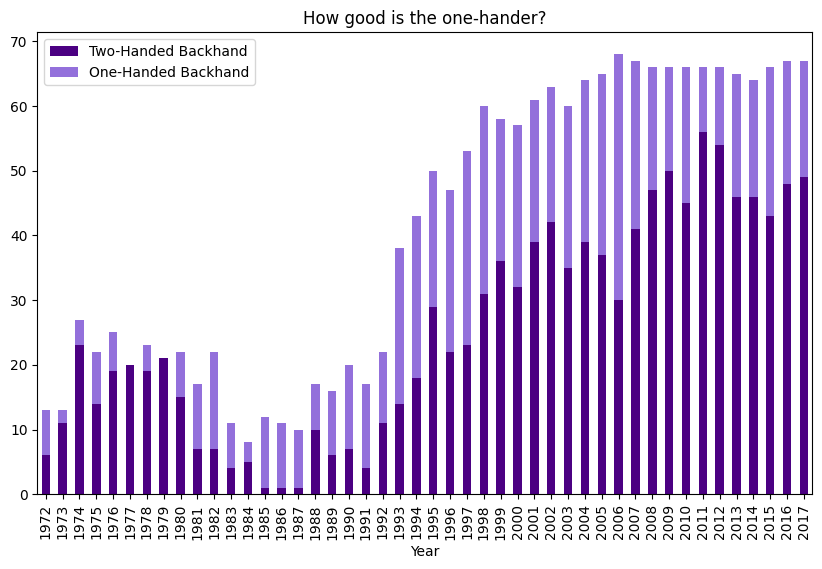

In [18]:
# How has the share of one-handed backhand victories changed over time?

def ann_backhand_breakdown(table: pd.DataFrame) -> pd.DataFrame:
    store_proto: np.ndarray = np.zeros(shape=(len(range(1972,2018,1)),2))
    store: pd.DataFrame = pd.DataFrame(store_proto)
    index: int = 0
    for i in range(1972,2018,1):
        one_tally : int = 0
        two_tally : int = 0
        for j in range(len(table)):
            if table.iloc[j,0] == i and table.iloc[j,16] == "One-Handed Backhand":
                one_tally = one_tally + 1
            elif table.iloc[j,0] == i and table.iloc[j,16] == "Two-Handed Backhand":
                two_tally = two_tally + 1
        store.iloc[index,0] = two_tally
        store.iloc[index,1] = one_tally
        index = index + 1
    return store

winners_by_backhand = ann_backhand_breakdown(tourney_final)
# winners_by_backhand.head(10)

winners_by_backhand = winners_by_backhand.rename(
    columns = {
        0 : "Two-Handed Backhand",
        1 : "One-Handed Backhand"
    }
)

# Fix the indexing

years_col = winners_by_backhand["Two-Handed Backhand"].index + 1972

years_col = years_col.to_numpy()
years_col = pd.DataFrame({"Year" : years_col})

winners_by_backhand = winners_by_backhand.reset_index(drop = True)

winners_by_backhand = pd.concat([years_col, winners_by_backhand], axis = 1, join = "inner")

colors = ["indigo", "mediumpurple"]

winners_by_backhand.plot.bar(
    stacked = True,
    x = "Year",
    figsize = ([10,6]),
    color = colors,
    title = "How good is the one-hander?"
)

<Axes: title={'center': 'Backhand type among new pros'}, xlabel='Year'>

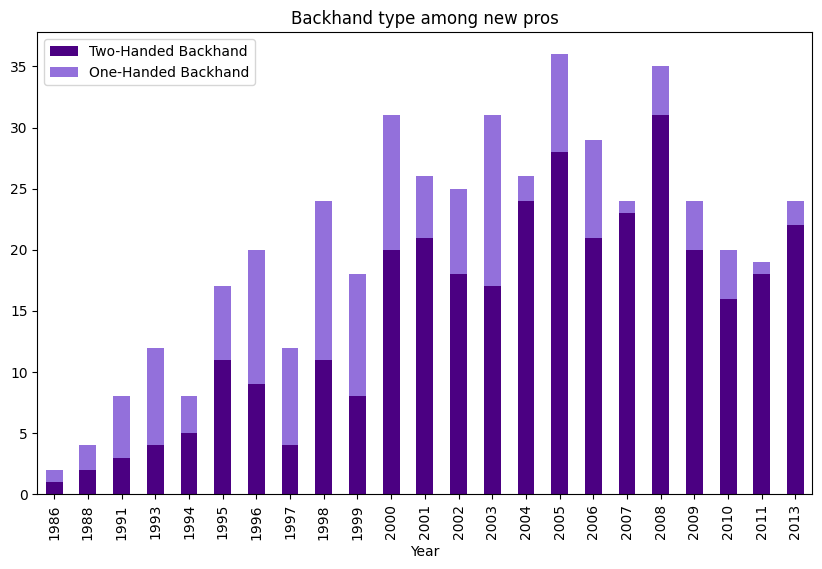

In [15]:
# Is the one-handed backhand declining in popularity over time?

# Find the faction of players who turned pro in a given year with one-handed backhands, for every year turned pro
# Assuming that turned pro is an adequate proxy for age, since the vast majority of players turn pro in their late-teens/early twenties.

def backhand_func(table : pd.DataFrame) -> pd.DataFrame:
    store_proto: np.ndarray = np.zeros(shape=(len(range(1972,2015,1)),2))
    store: pd.DataFrame = pd.DataFrame(store_proto)
    index: int = 0
    for i in range(1972,2015,1):
        two_tally : int = 0
        one_tally : int = 0
        for j in range(len(table)):
            if table.iloc[j,3] == i and table.iloc[j,9] == "Two-Handed Backhand":
                two_tally = two_tally + 1
            elif table.iloc[j,3] == i and table.iloc[j,9] == "One-Handed Backhand":
                one_tally = one_tally + 1
        store.iloc[index, 0] = two_tally
        store.iloc[index, 1] = one_tally
        index = index + 1
    return store

backhand_table = backhand_func(set_final)

backhand_table = backhand_table.rename(
    columns = {
        0 : "Two-Handed Backhand",
        1 : "One-Handed Backhand"
    }
)

# Remove years where there are no players in the dataset who turned pro in that year

mask = (backhand_table["Two-Handed Backhand"] != 0) & (backhand_table["One-Handed Backhand"] != 0)

unwanted_rows = backhand_table[~mask]

backhand_table = backhand_table.drop(unwanted_rows.index)

# Fix the indexing

years_col = backhand_table["Two-Handed Backhand"].index + 1972

years_col = years_col.to_numpy()

years_col = pd.DataFrame({"Year" : years_col})

backhand_table = backhand_table.reset_index(drop = True)

backhand_table = pd.concat([years_col, backhand_table], axis = 1, join = "inner")

colors = ["indigo", "mediumpurple"]

backhand_table.plot.bar(
    stacked = True,
    x = "Year",
    figsize = ([10,6]),
    color = colors,
    title = "Backhand type among new pros"
)


The first purple graph shows the share of titles won every year by one- and two-handed players. What's immediately clear is that, despite the one-handed backhand declining in popularity, one-handers manage to win more than their fair share of titles on tour even at points in the 2010s. Although two-handers have dominated at times, one-handers have never been completely shut out of the winners' circle. At the very least, an effective one-hander is certainly not a disadvantage.

The changing share of one-handed backhands in recent years may shed some light on the success of one-handed players. The second graph shows the backhand style breakdown of players who have turned pro in every year from 1986 to 2013. Early on one-handers seemed to be slightly more popular, until the 2000s when two-handed backhands began to dominate the tour. Therefore, part of the overrepresentation of one-handers in the winners dataset may be due to the fact that many of the younger two-handers have not yet finished their career and thus have not had the chance to accumulate as many titles. Nevertheless, the success of one-handers is a notable trend in the data across all years.

In [16]:
# Extra stuff

# player_names: List = array[:,1]
# print(player_names[1])
# print(len(player_names))

# def turned_pro_after_90(input_table: np.ndarray) -> List[str]: 
#     store: np.ndarray = []
#     for i in range(len(input_table)) :
#         if input_table[i, 12] > 1990 : 
#             store.append(input_table[i,1])
#     return(store)

# print(turned_pro_after_90(array))
# print("")
# print("The number of players in the dataset who turned pro 1991 or later is " + str(len(turned_pro_after_90(array))))
# print("")

# #We can generalize this function to be given a year and return the number of players who turned pro after that year:

# def turned_pro_after_year(input_table: np.ndarray, cutoff: int) -> List[str]: 
#     store: np.ndarray = []
#     for i in range(len(input_table)) :
#         if input_table[i, 12] > cutoff : 
#             store.append(input_table[i,1])
#     return(store)
    
# #run for 2015 to see all the hot young talent
# print(turned_pro_after_year(array,2015))